# practicalMixGaussC

The goal of this part of the lab is to fit a mixture of gaussians model to some multi-dimensional data. To do this, we will first generate some data from a known mixture of gaussians model and fit our own mixture of gaussians model to the generated data. The parameters from our estimated mixture of gaussians model should roughly match those of the original known model. 

Note that you should not use multivariate_normal.pdf for calculating likelihood.

You should use this template for your code and fill in the missing 
sections marked "TO DO."



In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as spio
from scipy.stats import norm 
from scipy.stats import multivariate_normal
import time
import sys

flt_min = sys.float_info.min

%matplotlib notebook

## Construct Ground Truth Mixture of Gaussians Model and Plot Some Points

Define some true parameters for our grounf truth mixture of $k$ Gaussians model. We will represent the 
mixtures of Gaussians as a python dictionary. The mean field is a $d \times k$ matrix and the cov field is a 
$d \times d \times k$ matrix.

In [2]:
mixGaussTrue = dict()
mixGaussTrue['k'] = 3
mixGaussTrue['d'] = 2
mixGaussTrue['weight'] = np.array([0.1309, 0.3966, 0.4725])
mixGaussTrue['mean'] = np.array([[ 4.0491 , 4.8597],[ 7.7578 , 1.6335],[ 11.9945, 8.9206]]).T
mixGaussTrue['cov'] = np.reshape([0.5, 0.25], newshape=(1,1,2))
mixGaussTrue['cov'] = np.zeros(shape=(mixGaussTrue['d'],mixGaussTrue['d'],mixGaussTrue['k']))
mixGaussTrue['cov'][:,:,0] = np.array([[  4.2534, 0.4791], [0.4791, 0.3522]])
mixGaussTrue['cov'][:,:,1] = np.array([[  0.9729, 0.8723],[  0.8723,  2.6317]])
mixGaussTrue['cov'][:,:,2] = np.array([[  0.9886, -1.2244],[ -1.2244, 3.0187]])

**drawEMData2d**, **sampleFromDiscrete**, **getGaussian2SD**, and **drawGaussianOutline** are helper functions.

In [3]:
def sampleFromDiscrete(probDist):     
    """
    Draws a random sample from a discrete probability distribution using a rejection sampling method.  
    
    Keyword arguments:
    probDist -- discrete probability ditrubtion to sample from.
    
    Returns: 
    r -- sampled point.
    """
    nIndex = len(probDist)                                                                 
    while True:                                                                            
        #choose random index                                                               
        r=int(np.floor(np.random.uniform()*nIndex))                                        
        #choose random height                                                              
        randHeight = np.random.uniform()                                                   
        #if height is less than probability value at this point in the                     
        # histogram then select                                                            
        if randHeight<probDist[r]:                                                         
            break                                                                          
    return r                                                                               

In [4]:
def getGaussian2SD(m,s,angle1):
    """
    Find position of in xy co-ordinates at 2SD out for a certain angle.
    """
  
    if s.shape[1] == 1:
        s = diag(s)

    vec = np.array([np.cos(angle1), np.sin(angle1)])
    
    factor = 4/(vec@np.linalg.inv(s)@vec.T)
    
    x = np.cos(angle1) * np.sqrt(factor)
    y = np.sin(angle1) * np.sqrt(factor)

    x = x + m[0]
    y = y + m[1]
                
    return x,y

In [5]:
def drawGaussianOutline(m,s,w):
    """
    Draw 2DGaussian
    """
    angleInc = 0.1    
    c = (0.9*(1-w), 0, 0)

    for cAngle in np.arange(0,2*np.pi,angleInc):         
        angle1 = cAngle
        angle2 = cAngle+angleInc
        x1, y1 = getGaussian2SD(m,s,angle1)
        x2, y2 = getGaussian2SD(m,s,angle2)
        plt.plot([x1, x2],[y1, y2],'-',linewidth=2,color=c)                 
    return

In [6]:
def drawEMData2d(data,mixGauss):
    """
    Plot the data plot the mixtures of Gaussian model, mixGauss, on top of it.
    
    Keyword arguments:
    data -- d by n matrix of data points.
    mixGauss -- dict with mixture of gaussian information.
    
    """
    #set(gcf,'Color',[1 1 1])
    plt.cla() 
    plt.plot(data[0,:],data[1,:],'k.')

    for cGauss in range(mixGauss['k']):
        drawGaussianOutline(mixGauss['mean'][:,cGauss],mixGauss['cov'][:,:,cGauss],mixGauss['weight'][cGauss])
    
    return     


**TODO HERE:**

Complete the TO DO in this function before moving on.

In [7]:
def mixGaussGen(mixGauss, nData):                                                                              
    """
    Generates data from a d-dimensional mixture of Gaussians model. 
    
    Keyword arguments:
    mixGauss -- dict containing the mixture of gaussians arguments.
    nData -- number of data points to generate.
    
    Returns: 
    data -- d by nData, generated data points. 
    
    """
    # create space for output data                                                                               
    data = np.zeros(shape=(mixGauss['d'], nData))                                                                            
    # for each data point                                                                                        
    for cData in range(nData):                                                                                   
        # 1. Randomly choose Gaussian according to probability distributions                                        
        h = sampleFromDiscrete(mixGauss['weight'])  

        # 2. Draw a sample from the appropriate Gaussian distribution 
        mean = mixGauss['mean'][:, h]
        cov = mixGauss['cov'][:, :, h]

        # 3. Sample from the covariance matrix (google how to do this - it
        # will involve the numpy function np.linalg.cholesky().  Then add the mean vector
        cholesky_decomp = np.linalg.cholesky(cov)
        sample = np.random.randn(mixGauss['d'])
        generated_data_point = mean + np.dot(cholesky_decomp, sample)

        # TO DO (f)- insert data generation code here  
        # 4. Store the generated data point in the data matrix                                                                             
        data[:, cData] = generated_data_point
                                                                                                         
    return data


With all the helper functions complete, we can now generate and plot some points from our model. The black points are the generated data points. The circles are what the gaussians look like.

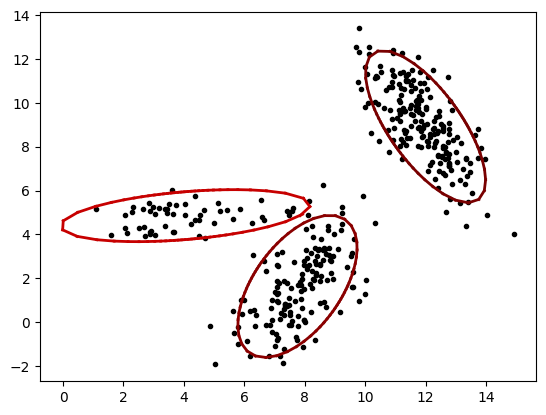

In [8]:
%matplotlib inline

#define number of samples to generate
nData = 400;

#generate data from the mixture of Gaussians
#make sure you've filled in the routine above.
data = mixGaussGen(mixGaussTrue,nData)

#draw data, true Gaussians
drawEMData2d(data,mixGaussTrue)

The image shows the initial distribution of data in relation to the red ellipses, which represent the density for each component of the Gaussian mixture model. 
These densities indicate where data points are most likely to be found, according to the current means and covariances of each Gaussian in the mixture. Most points are observed to cluster within these ellipses; however, the presence of points outside these areas suggests the need for further refinement of the model's parameters to capture these outliers, which is exactly what the subsequent steps aim to achieve.

## Estimate MoG using the E-M Algorithm
Here we want to use the E-M algorithm to fit a MoG model to our data points. 

**TODO HERE:** 

Fill out the missing parts below. 

The log likelihood is taken since the raw likelihood value could be too small for our machine's percision.

In [9]:
def getMixGaussLogLike(data, mixGaussEst): 
    """
    Calculate the og likelihood for the given dataset under the provided mixture of Gaussians model. 
    It computes the likelihood of each data point under the mixture of Gaussians and accumulates the log likelihood for all data points.
    
    Keyword arguments:
    data -- d by n matrix containing data points.
    mixGaussEst -- dict containing the mixture of gaussians parameters.

    Returns: 
    logLike -- scalar containing the log likelihood.
    
    """
    data = np.atleast_2d(data)                                                                         
    # Find total number of data items                                                                  
    nDims, nData = data.shape                                                                          
    
    # Initialize log likelihoods                                                                       
    logLike = 0;                                                                                       
                                                                                                       
    # Run through each data item                                                                       
    for cData in range(nData):                                                                         
        thisData = data[:, cData]        

        # TO DO - calculate likelihood of this data point under mixture of                         
        # Gaussians model. Replace this                                                                
        # Calculate the likelihood of this data point under the mixture of Gaussians model
        like = 0.0
        for cGauss in range(mixGaussEst['k']):
            # Calculate the likelihood of the data point for each Gaussian component
            mean = mixGaussEst['mean'][:, cGauss]
            cov = mixGaussEst['cov'][:, :, cGauss]
            weight = mixGaussEst['weight'][cGauss]

            # Compute the likelihood using the multivariate Gaussian PDF
            exponent = -0.5 * np.dot(np.dot((thisData - mean).T, np.linalg.inv(cov)), (thisData - mean))
            det_cov = np.linalg.det(cov)
            gauss_like = (1.0 / np.sqrt((2 * np.pi) ** nDims * det_cov)) * np.exp(exponent)

            # Add this Gaussian's contribution to the mixture
            like += weight * gauss_like

        # Add the log-likelihood of this data point to the total log-likelihood
        logLike += np.log(like)

    return logLike                                                                                     

**TODO HERE:** 

Fill out the missing parts below. 

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Define your helper functions here
# ...

def fitMixGauss(data, k):
    """
    Estimate a k MoG model that would fit the data. Incrementally plots the outcome.
    
    Keyword arguments:
    data -- d by n matrix containing data points.
    k -- scalar representing the number of gaussians to use in the MoG model.
    
    Returns: 
    mixGaussEst -- dict containing the estimated MoG parameters.
    
    """
    
    # Initialize parameters for the mixture of Gaussians model
    nDims, nData = data.shape
    postHidden = np.zeros(shape=(k, nData))

    mixGaussEst = dict()
    mixGaussEst['d'] = nDims
    mixGaussEst['k'] = k
    mixGaussEst['weight'] = (1 / k) * np.ones(shape=(k))
    mixGaussEst['mean'] = 2 * np.random.randn(nDims, k)
    mixGaussEst['cov'] = np.zeros(shape=(nDims, nDims, k))
    for cGauss in range(k):
        mixGaussEst['cov'][:, :, cGauss] = 2.5 + 1.5 * np.random.uniform() * np.eye(nDims)

    # Calculate current likelihood
    logLike = getMixGaussLogLike(data, mixGaussEst)
    print('Log Likelihood Iter 0 : {:4.3f}\n'.format(logLike))

    nIter = 30
    logLikeVec = np.zeros(shape=(2 * nIter))
    boundVec = np.zeros(shape=(2 * nIter))

    fig, ax = plt.subplots(1, 1)

    for cIter in range(nIter):

        # ===================== =====================
        # Expectation step
        # ===================== =====================

        for cData in range(nData):
            # Calculate posterior probability that this data point came from each of the Gaussians
            postHidden[:, cData] = np.zeros(k)  # Initialize to zero

            for cGauss in range(k):
                # Calculate posterior probability for each Gaussian component
                mean = mixGaussEst['mean'][:, cGauss]
                cov = mixGaussEst['cov'][:, :, cGauss]
                weight = mixGaussEst['weight'][cGauss]

                # Compute the likelihood using the multivariate Gaussian PDF
                exponent   = -0.5 * np.dot(np.dot((data[:, cData] - mean).T, np.linalg.inv(cov)), (data[:, cData] - mean))
                det_cov    = np.linalg.det(cov)
                gauss_like = (1.0 / np.sqrt((2 * np.pi) ** nDims * det_cov)) * np.exp(exponent)

                # Calculate the posterior probability for this Gaussian component
                postHidden[cGauss, cData] = weight * gauss_like

            # Normalize the posterior probabilities
            postHidden[:, cData] /= np.sum(postHidden[:, cData])

        # ===================== =====================
        # Maximization Step
        # ===================== =====================

        for cGauss in range(k):
            # Update weighting parameters based on the total posterior probability associated with each Gaussian
            mixGaussEst['weight'][cGauss] = np.sum(postHidden[cGauss, :]) / nData

            # Update mean parameters by weighted average where weights are given by posterior probability
            mixGaussEst['mean'][:, cGauss] = np.dot(data, postHidden[cGauss, :]) / np.sum(postHidden[cGauss, :])

            # Update covariance parameter based on weighted average of square distance from updated mean
            cov_sum = np.zeros((nDims, nDims))  # Initialize a matrix for the weighted sum
            for cData in range(nData):
                data_minus_mean = (data[:, cData] - mixGaussEst['mean'][:, cGauss]).reshape(-1, 1)
                cov_sum += postHidden[cGauss, cData] * np.dot(data_minus_mean, data_minus_mean.T)
            
            mixGaussEst['cov'][:, :, cGauss] = cov_sum / np.sum(postHidden[cGauss, :])  # Taking all the elements raws and colums and fill for covariance matrix 

        # Draw the new solution
        drawEMData2d(data, mixGaussEst)
        time.sleep(0.7)
        fig.canvas.draw()

        # Calculate the log likelihood
        logLike = getMixGaussLogLike(data, mixGaussEst)
        print('Log Likelihood After Iter {} : {:4.3f}\n'.format(cIter, logLike))

    return mixGaussEst

### Time to put it all together!

Make sure you've filled all the TO DOs above! 

### With 100 iterations to see how the elipses change

Log Likelihood Iter 0 : -5891.369

Log Likelihood After Iter 0 : -1953.500

Log Likelihood After Iter 1 : -1889.125

Log Likelihood After Iter 2 : -1873.935

Log Likelihood After Iter 3 : -1870.594

Log Likelihood After Iter 4 : -1869.824

Log Likelihood After Iter 5 : -1869.255

Log Likelihood After Iter 6 : -1868.362

Log Likelihood After Iter 7 : -1866.836

Log Likelihood After Iter 8 : -1864.692

Log Likelihood After Iter 9 : -1862.726

Log Likelihood After Iter 10 : -1861.905

Log Likelihood After Iter 11 : -1861.600

Log Likelihood After Iter 12 : -1861.427

Log Likelihood After Iter 13 : -1861.271

Log Likelihood After Iter 14 : -1861.017

Log Likelihood After Iter 15 : -1860.455

Log Likelihood After Iter 16 : -1859.600

Log Likelihood After Iter 17 : -1859.171

Log Likelihood After Iter 18 : -1859.087

Log Likelihood After Iter 19 : -1859.066

Log Likelihood After Iter 20 : -1859.058

Log Likelihood After Iter 21 : -1859.056

Log Likelihood After Iter 22 : -1859.055

Log Likel

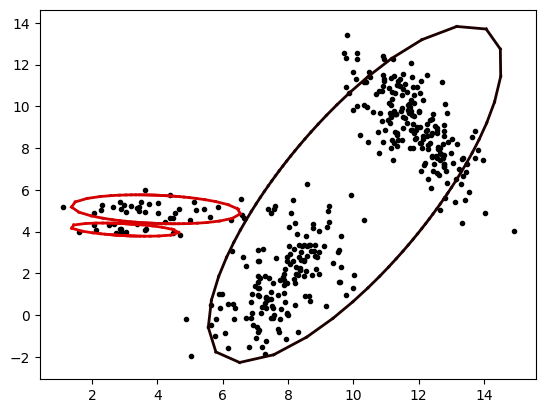

In [15]:
mixGaussEst_bis = fitMixGauss(data,3)

### With 30 iterations

Log Likelihood Iter 0 : -7350.340

Log Likelihood After Iter 0 : -1898.839

Log Likelihood After Iter 1 : -1879.843

Log Likelihood After Iter 2 : -1856.578

Log Likelihood After Iter 3 : -1819.653

Log Likelihood After Iter 4 : -1770.871

Log Likelihood After Iter 5 : -1678.329

Log Likelihood After Iter 6 : -1612.536

Log Likelihood After Iter 7 : -1602.594

Log Likelihood After Iter 8 : -1602.446

Log Likelihood After Iter 9 : -1602.444

Log Likelihood After Iter 10 : -1602.444

Log Likelihood After Iter 11 : -1602.444

Log Likelihood After Iter 12 : -1602.444

Log Likelihood After Iter 13 : -1602.444

Log Likelihood After Iter 14 : -1602.444

Log Likelihood After Iter 15 : -1602.444

Log Likelihood After Iter 16 : -1602.444

Log Likelihood After Iter 17 : -1602.444

Log Likelihood After Iter 18 : -1602.444

Log Likelihood After Iter 19 : -1602.444

Log Likelihood After Iter 20 : -1602.444

Log Likelihood After Iter 21 : -1602.444

Log Likelihood After Iter 22 : -1602.444

Log Likel

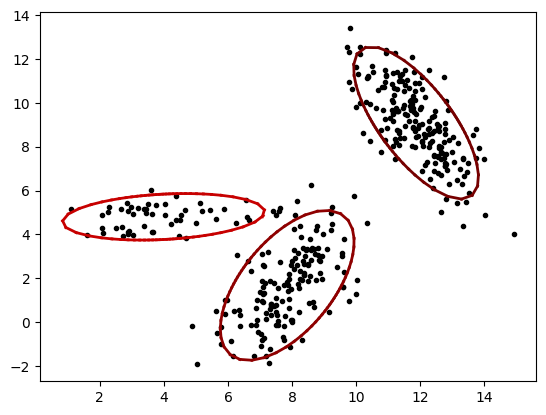

In [18]:
mixGaussEst_bis = fitMixGauss(data,3)

The image (with 30 iterations) illustrates the results after employing the EM algorithm. The application of this algorithm has enabled the refinement of the Gaussian mixture model parameters, iterating to encapsulate the data more effectively within the ellipses. Additionally, the improvement in log likelihood indicates an increased probability given the data evidence. The red ellipses have subtly altered compared to the previous image.

A trial with a significantly higher number of iterations, 100, reveals that the red contours have 'stretched' to encompass a wider array of data, but at the risk of overfitting. Therefore, it is important to consider a balance in the model's complexity to prevent over- or underfitting. Ideally, the ellipses would capture a greater number of data points, and to enhance this robustness incorporating a larger dataset or cross validation could be employed to evaluate generalization